# Exploratory Data Analysis of TREC dataset

## Library instalation and importation

In [ ]:
!pip install datasets

In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import string
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## Load Dataset
Trec is a text dataset that contains questions in english that are classified into categories (coarse_label) and subcategories (fine_label).


In [2]:
dataset = load_dataset('trec')

  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
df = pd.DataFrame(columns=['text','coarse_label', 'fine_label'])
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

df['text'] = dataset['train']['text'] + dataset['test']['text']
df['coarse_label'] = dataset['train']['coarse_label'] + dataset['test']['coarse_label']
df['fine_label'] = dataset['train']['fine_label'] + dataset['test']['fine_label']

## Dataset structure

In [4]:
df.head()

,text,coarse_label,fine_label
0,How did serfdom develop in and then leave Russ...,2,26
1,What films featured the character Popeye Doyle ?,1,5
2,How can I find a list of celebrities ' real na...,2,26
3,What fowl grabs the spotlight after the Chines...,1,2
4,What is the full form of .com ?,0,1


In [5]:
print(f"There are {df_train.shape[0]} questions for trainning.")
print(f"There are {df_test.shape[0]} questions for trainning.")

There are 5452 questions for trainning.
There are 500 questions for trainning.


In [6]:
print(f"There are {df['coarse_label'].unique().size} categories:")
print(np.sort(df['coarse_label'].unique()))
print(f"There are {df['fine_label'].unique().size} subcategories:")
print(np.sort(df['fine_label'].unique()))

There are 6 categories:
[0 1 2 3 4 5]
There are 50 subcategories:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [7]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [8]:
df['cleaned_text'] = [clean_text(t) for t in df.text]
df['length'] = [len(x) for x in df.text]
df['n_words'] = [len(x.split()) for x in df.cleaned_text]

df_train['cleaned_text'] = [clean_text(t) for t in df_train.text]
df_train['length'] = [len(x) for x in df_train.text]
df_train['n_words'] = [len(x.split()) for x in df_train.cleaned_text]

df_test['cleaned_text'] = [clean_text(t) for t in df_test.text]
df_test['length'] = [len(x) for x in df_test.text]
df_test['n_words'] = [len(x.split()) for x in df_test.cleaned_text]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          5952 non-null   object
 1   coarse_label  5952 non-null   int64 
 2   fine_label    5952 non-null   int64 
 3   cleaned_text  5952 non-null   object
 4   length        5952 non-null   int64 
 5   n_words       5952 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 279.1+ KB


In [9]:
df.describe()

,coarse_label,fine_label,length,n_words
count,5952.000000,5952.000000,5952.000000,5952.000000
mean,2.775034,26.286794,49.399362,8.708669
std,1.430738,10.901412,20.676899,3.606200
min,0.000000,0.000000,13.000000,2.000000
25%,2.000000,24.000000,35.000000,6.000000
50%,3.000000,29.000000,46.000000,8.000000
75%,4.000000,35.000000,60.000000,11.000000
max,5.000000,49.000000,196.000000,33.000000


In [10]:
df_train.describe()

,coarse_label,fine_label,length,n_words
count,5452.000000,5452.000000,5452.000000,5452.000000
mean,2.762839,26.184336,50.632062,8.916911
std,1.423674,10.859164,20.743208,3.609730
min,0.000000,0.000000,13.000000,2.000000
25%,2.000000,24.000000,36.000000,6.000000
50%,3.000000,29.000000,48.000000,8.000000
75%,4.000000,35.000000,61.000000,11.000000
max,5.000000,49.000000,196.000000,33.000000


In [11]:
df_test.describe()

,coarse_label,fine_label,length,n_words
count,500.00000,500.000000,500.000000,500.000000
mean,2.90800,27.404000,35.958000,6.438000
std,1.50068,11.302933,14.168759,2.666905
min,0.00000,0.000000,13.000000,3.000000
25%,2.00000,24.000000,25.000000,4.000000
50%,3.00000,29.000000,34.000000,6.000000
75%,4.00000,35.000000,44.000000,8.000000
max,5.00000,49.000000,91.000000,16.000000


In the train dataset the questions have in average 8.9 words and 50.6 characters.

## Category distribution

Text(0, 0.5, 'Recompte')

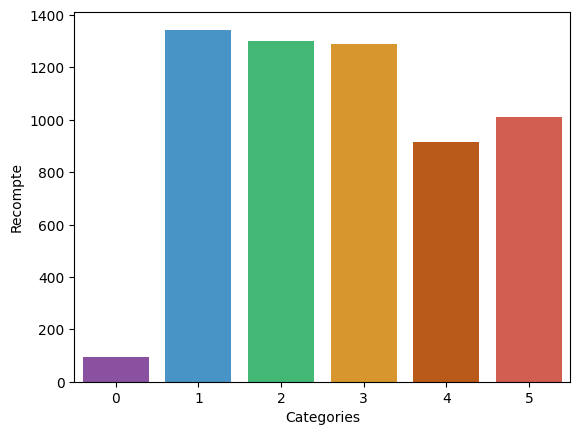

In [13]:
colors = ["#8E44AD", "#3498DB", "#2ECC71", "#F39C12", "#D35400", "#E74C3C"]
p = sns.countplot(data=df, x='coarse_label', palette=colors)
plt.xlabel('Categories')
plt.ylabel('Recompte')

We can see that the classes are not equally distributed as there are only a few examples for class 0.

## Subcategory distribution

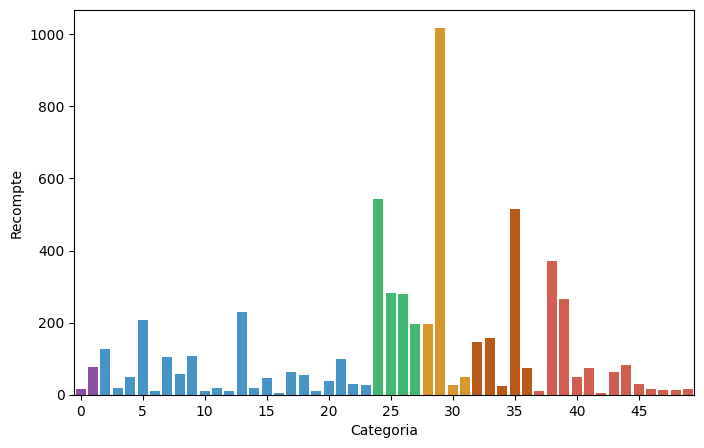

In [14]:
colors_fine_label = []
fine_labels = [2, 22, 4, 4, 5, 13]
for i in range(len(fine_labels)):
  for j in range(fine_labels[i]):
    colors_fine_label.append(colors[i])

plt.figure(figsize=(8,5))
p = sns.countplot(data=df, x='fine_label', palette=colors_fine_label)
ticks, labels = plt.xticks()
plt.xticks(ticks[::5], labels[::5])
plt.xlabel('Categoria')
plt.ylabel('Recompte')
plt.show()

## Word cloud

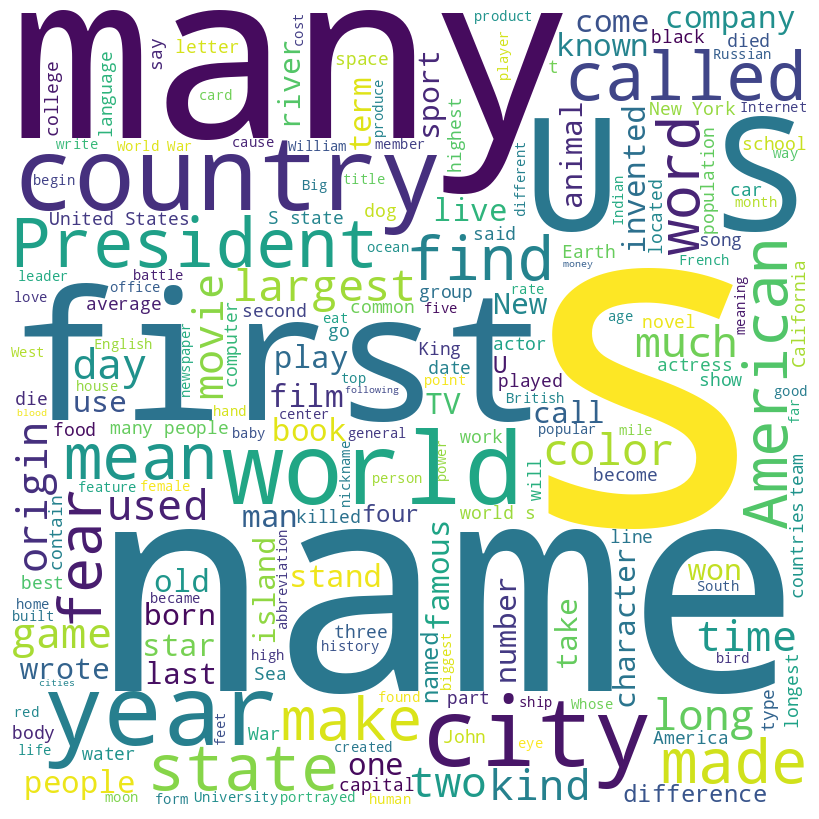

In [15]:
# Create a single string with all text
all_text = ' '.join(df.text.tolist())
all_text_cleaned = clean_text(all_text)

# Create a Word Cloud object
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = STOPWORDS, 
                      min_font_size = 10).generate(all_text) 
  
# Plot the Word Cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()